<a href="https://colab.research.google.com/github/subhash505/datat_analytics/blob/main/jm_basics_markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  
from pandas_datareader import data as dr 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pip install --upgrade pandas-datareader

# Simple Rate of Return


In [ ]:
#Importing the data
PG = dr.DataReader('PG', data_source='yahoo', start='1995-1-1',end='2020-1-1')      

In [ ]:
#Displaying the head of the dataframe PG. head() displays first 5 rows by default. 
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.063840
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.999201
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.886079
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.902242
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.869921


In [ ]:
#Displaying the tail of the dataframe PG. tail() displays last 5 rows by default.
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,125.309998,124.580002,124.790001,125.220001,2022100.0,119.942581
2019-12-26,125.750000,124.870003,125.099998,125.220001,4760400.0,119.942581
2019-12-27,126.300003,125.389999,125.559998,126.089996,5192000.0,120.775909
2019-12-30,125.980003,124.139999,125.760002,124.470001,3884300.0,119.224174
2019-12-31,124.989998,123.949997,124.430000,124.900002,4798900.0,119.636070


In [ ]:
PG['Adj Close'].head()

Date
1995-01-03    8.063840
1995-01-04    7.999201
1995-01-05    7.886079
1995-01-06    7.902242
1995-01-09    7.869921
Name: Adj Close, dtype: float64

In [ ]:
PG['Adj Close'].shift(1).head()

Date
1995-01-03         NaN
1995-01-04    8.063840
1995-01-05    7.999201
1995-01-06    7.886079
1995-01-09    7.902242
Name: Adj Close, dtype: float64

In [ ]:
PG['Adj Close']/PG['Adj Close'].shift(1).head()

Date
1995-01-03         NaN
1995-01-04    0.991984
1995-01-05    0.985858
1995-01-06    1.002050
1995-01-09    0.995910
                ...   
2019-12-24         NaN
2019-12-26         NaN
2019-12-27         NaN
2019-12-30         NaN
2019-12-31         NaN
Name: Adj Close, Length: 6294, dtype: float64

image.png

In [ ]:
PG['Simple Return'] = (PG['Adj Close']/PG['Adj Close'].shift(1))-1  

print(PG['Simple Return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002050
1995-01-09   -0.004090
                ...   
2019-12-24    0.002562
2019-12-26    0.000000
2019-12-27    0.006948
2019-12-30   -0.012848
2019-12-31    0.003455
Name: Simple Return, Length: 6294, dtype: float64


In [ ]:
daily_avg_returns = PG['Simple Return'].mean() # stocks return daily
daily_avg_returns

0.0005268564911291957

In [ ]:
annual_avg_returns = PG['Simple Return'].mean() * 250
annual_avg_returns

0.13171412278229894

# Log Returns using Python

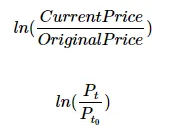

In [ ]:
PG['Log Return'] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))

#print() function prints the value inside it on the console.
print(PG['Log Return']) 

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2019-12-24    0.002559
2019-12-26    0.000000
2019-12-27    0.006924
2019-12-30   -0.012931
2019-12-31    0.003449
Name: Log Return, Length: 6294, dtype: float64


In [ ]:
daily_log_returns = PG['Log Return'].mean()
daily_log_returns

0.00042858168246904073

In [ ]:
annual_log_returns = PG['Log Return'].mean() * 250
annual_log_returns

0.10714542061726018

# Expected Return of a Portfolio

In [ ]:
assets = ['PG', 'MSFT', 'GE']
assetsAdjClose = pd.DataFrame()
for a in assets:
    assetsAdjClose[a] = dr.DataReader(a, data_source='yahoo', start='1995-1-1')['Adj Close']

In [ ]:
assetsAdjClose.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6688 entries, 1995-01-03 to 2021-07-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6688 non-null   float64
 1   MSFT    6688 non-null   float64
 2   GE      6688 non-null   float64
dtypes: float64(3)
memory usage: 209.0 KB


In [ ]:
assetsAdjClose.head() 

,PG,MSFT,GE
Date,,,
1995-01-03,8.063840,2.383754,4.116460
1995-01-04,7.999201,2.401081,4.116460
1995-01-05,7.886079,2.361476,4.126550
1995-01-06,7.902242,2.401081,4.106370
1995-01-09,7.869921,2.386229,4.066014


In [ ]:
assetsAdjClose.tail() 

,PG,MSFT,GE
Date,,,
2021-07-20,138.816940,279.320007,12.70
2021-07-21,138.329987,281.399994,13.08
2021-07-22,137.800003,286.140015,12.70
2021-07-23,139.789993,289.670013,12.71
2021-07-26,140.279999,289.049988,12.92


In [ ]:
assetsAdjClose.iloc[0]       #Gives the first row figures of the dataframe.

PG      8.063840
MSFT    2.383754
GE      4.116460
Name: 1995-01-03 00:00:00, dtype: float64

In [ ]:
returns = (assetsAdjClose/assetsAdjClose.shift(1)) - 1       #calculating simple rate of return
returns.head()       #displaying first 5 rows of returns dataframe

,PG,MSFT,GE
Date,,,
1995-01-03,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.000000
1995-01-05,-0.014142,-0.016495,0.002451
1995-01-06,0.002050,0.016771,-0.004890
1995-01-09,-0.004090,-0.006186,-0.009828


In [ ]:
weightsDifferent = np.array([0.25, 0.5, 0.25])  #Note: the sum of the weights should be equal to 1.
annualReturns = returns.mean()*250

In [ ]:
np.dot(annualReturns, weightsDifferent)  # R*WT

0.17100049653962598

In [ ]:
portfolioDifferentWeights = str(round(np.dot(annualReturns, weightsDifferent)*100, 5)) + ' %'

In [ ]:
print("The cumulative return for portfolio with different weights is ", portfolioDifferentWeights)


The cumulative return for portfolio with different weights is  17.10005 %
